<a href="https://colab.research.google.com/github/Vaezi92/Barycentric-Turbulence/blob/main/HeatGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'''
This is an example of read heat transfer phenomena dataset created by Mohammad Edalatifar and Mohammad Ghalambaz.
Dataset Address:
To use this dataset please vite to:
{
}
'''
import numpy as np

Data = np.load('/content/drive/MyDrive/KIT-DeepLearning/Dataset/HeatTransferPhenomena_35_58.npz')
xTrain = Data['xTrain']
yTrain = Data['yTrain']
xTest = Data['xTest']
yTest = Data['yTest']
xValidation = Data['xValidation']
yValidation = Data['yValidation']

del Data

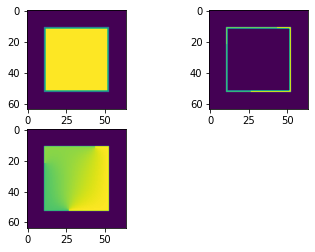

In [3]:

#%% Plot some images
import matplotlib.pyplot as plt
n=70
plt.subplot(2,2,1)
plt.imshow(xTrain[n,:,:,0])
plt.subplot(2,2,2)
plt.imshow(xTrain[n,:,:,1])
plt.subplot(2,2,3)
plt.imshow(yTrain[n,:,:,0])
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [5]:
def conv_residual_block(x, num_filters, strides=2):
    residual = x
    
    # First convolutional layer
    x = layers.Conv2D(num_filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    # Second convolutional layer
    x = layers.Conv2D(num_filters, kernel_size=(3, 3), strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    # Add the residual connection
    if strides != 1 or x.shape[3] != residual.shape[3]:
        residual = layers.Conv2D(num_filters, kernel_size=(1, 1), strides=strides, padding='valid')(residual)
        residual = layers.BatchNormalization()(residual)
    x = layers.add([x, residual])
    x = layers.Activation('relu')(x)
    
    return x
input = layers.Input(shape = (8,8,128))
y = conv_residual_block(input , 512)
print(y.shape)



(None, 4, 4, 512)


In [ ]:
def blockA(x):
    inputA = x
    # First laye
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(16, (3, 3), strides=1, activation=None, padding="same")(x)

    # Second layer
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(16, (3, 3), strides=1, activation=None, padding="same")(x)
    
    #x = x + inputA
    return x
input = layers.Input(shape=(64,64,2))
y = residual_blockA(input)

print(y.shape)


(None, 64, 64, 16)


In [ ]:
input = layers.Input(shape=(64, 64, 2))

# Encoder
y = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
y = layers.MaxPooling2D((2, 2), padding="same")(y)
y = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(y)
y = layers.MaxPooling2D((2, 2), padding="same")(y)

# Decoder
y = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(y)
y = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(y)
y = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(y)

# Autoencoder
autoencoder = Model(input, y)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 2)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 32)       9248  

In [ ]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (1, 64, 64, 2)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, 2 , padding='same', activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)


(1, 32, 32, 2)


In [ ]:
def blockA(x):
    x = layers.ReLU()(x)
    return x
    
def blockB(x):
    x = layers.Conv2D(32, (3, 3), strides=1, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, (3, 3), strides=1, activation="relu", padding="same")(x)
    return x


input = layers.Input(shape=(64, 64, 2))

# Encoder
x = layers.Conv2D(16, (3, 3), strides=1, activation="relu", padding="same")(input)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(256, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(256, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 64, 64, 2)]       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 64, 64, 16)        304       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 4, 4, 256)       

In [ ]:
input = layers.Input(shape=(128, 640, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(6, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 128, 640, 1)]     0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 128, 640, 32)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 320, 32)       0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 64, 320, 32)       9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 160, 32)       0         
_________________________________________________________________
conv2d_transpose_31 (Conv2DT (None, 64, 320, 32)       9248      
_________________________________________________________________
conv2d_transpose_32 (Conv2DT (None, 128, 640, 32)    